In [5]:
import pandas as pd
import starbars

# 'project_id', 'ensemble_id', 'cell_line', 'region_id', 'gene_id', 'enh_id', 'dist_avg_dist', 'has_link'
distances_with_links_exp_4 = pd.read_parquet("./links/experiment_4/distances_with_links.parquet").rename({"dist_avg_dist": "avg_dist"}, axis=1)
distances_with_links_exp_4['type'] = 'nean'

distances_with_links_exp_5 = pd.read_parquet("./links/experiment_5/distances_with_links.parquet").rename({"dist_avg_dist": "avg_dist"}, axis=1)
distances_with_links_exp_5['type'] = 'deni'

distances_with_links = pd.concat([distances_with_links_exp_4, distances_with_links_exp_5], ignore_index=True)

In [2]:
distances_with_links

,project_id,ensemble_id,cell_line,region_id,gene_id,enh_id,avg_dist,has_link
0,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:49823143-49824413,7.876060,False
1,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50012133-50013263,9.131163,False
2,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50492953-50494843,9.038205,False
3,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50795173-50796203,7.966821,False
4,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:51549141-51550061,8.569405,False
...,...,...,...,...,...,...,...,...
4843906,8k_models_project_HFFC6,models3D_HFFC6_Deni_models3D_HFFC6_Deni_result...,HFFC6,chr9:132231282-138394717,ENSG00000289701,chr9:134213504-134217374,12.972232,False
4843907,8k_models_project_HFFC6,models3D_HFFC6_Deni_models3D_HFFC6_Deni_result...,HFFC6,chr9:132231282-138394717,ENSG00000289701,chr9:134488114-134489684,14.046647,False
4843908,8k_models_project_HFFC6,models3D_HFFC6_Deni_models3D_HFFC6_Deni_result...,HFFC6,chr9:132231282-138394717,ENSG00000289701,chr9:134585344-134586804,16.003651,False
4843909,8k_models_project_HFFC6,models3D_HFFC6_Deni_models3D_HFFC6_Deni_result...,HFFC6,chr9:132231282-138394717,ENSG00000289701,chr9:136859128-136859208,4.911695,False


In [6]:
gm12878_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'GM12878']
hffc6_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'HFFC6']
h1esc_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'H1ESC']

In [7]:
distance_cutoff = {
    'H1ESC_Nean': 1.5819487888988626,
    'H1ESC_Deni': 1.5940225214185284,
    'HFFC6_Nean': 1.4982763183612486,
    'HFFC6_Deni': 1.7777412978743463,
    'WTC11_Nean': 0.49185075802354294,
    'WTC11_Deni': 0.49946283771094635,
    'GM12878_Nean': 1.3194976373807719,
    'GM12878_Deni': 1.2678860440889042
}

gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["avg_dist"] > distance_cutoff["GM12878_Deni"]]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["avg_dist"] > distance_cutoff["HFFC6_Deni"]]
h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["avg_dist"] > distance_cutoff["H1ESC_Deni"]]

# gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
# hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
# h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]

In [ ]:
gm12878_gene_to_closest_avg_enhancer_all = (
    gm12878_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)
gm12878_gene_to_closest_avg_enhancer_all['has_link'] = (
    gm12878_gene_to_closest_avg_enhancer_all.index
    .isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

hffc6_gene_to_closest_avg_enhancer_all = (
    hffc6_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

hffc6_gene_to_closest_avg_enhancer_all['has_link'] = (
    hffc6_gene_to_closest_avg_enhancer_all.index
    .isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

h1esc_gene_to_closest_avg_enhancer_all = (
    h1esc_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

h1esc_gene_to_closest_avg_enhancer_all['has_link'] = (
    h1esc_gene_to_closest_avg_enhancer_all.index
    .isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
ax = sns.violinplot(data=gm12878_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
gm12878_has_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
gm12878_no_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(gm12878_has_link, gm12878_no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")
# annotations = [(False, True, p)]  # Compare False vs True
# starbars.draw_annotation(
#     annotations=annotations,
#     ax=ax
# )

plt.xlabel("Has Confirmed Functional Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Closest Distance to Enhancer for All Genes that Have a Link or Not in GM12878")
plt.grid()
plt.savefig("figs/exp1_gm.png", dpi=300, bbox_inches='tight')
plt.show()

U-statistic: 6916865.5, p-value: 2.5252928556447934e-92


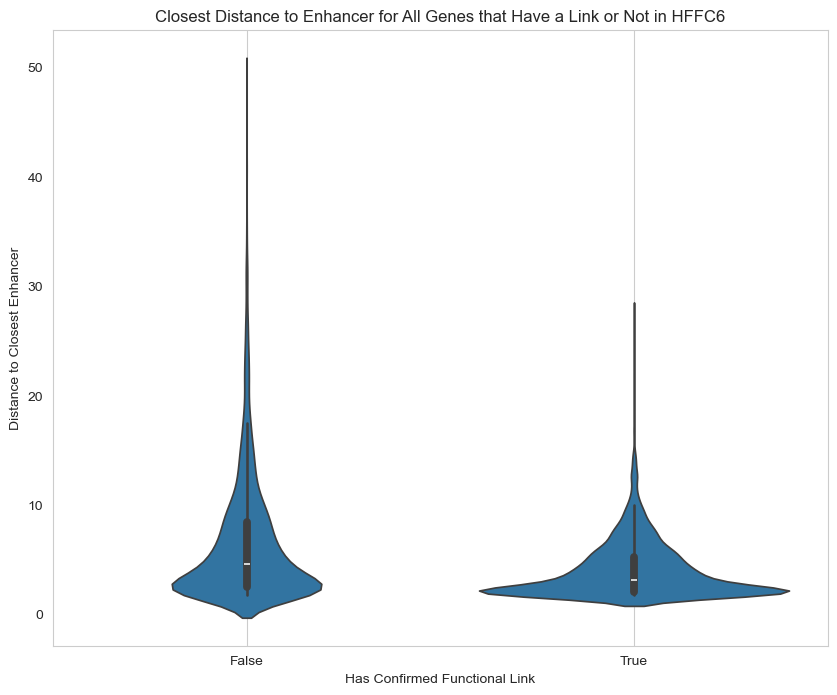

In [229]:
 # Box plot of the distance to the closest enhancer for all genes that have a link or not in HFFC6
plt.figure(figsize=(10, 8))
sns.violinplot(data=hffc6_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
hffc6_has_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
hffc6_no_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(hffc6_has_link, hffc6_no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Confirmed Functional Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Closest Distance to Enhancer for All Genes that Have a Link or Not in HFFC6")
plt.grid()
plt.savefig("figs/exp1_hffc.png", dpi=300, bbox_inches='tight')
plt.show()

U-statistic: 7255456.5, p-value: 4.766785186208411e-97


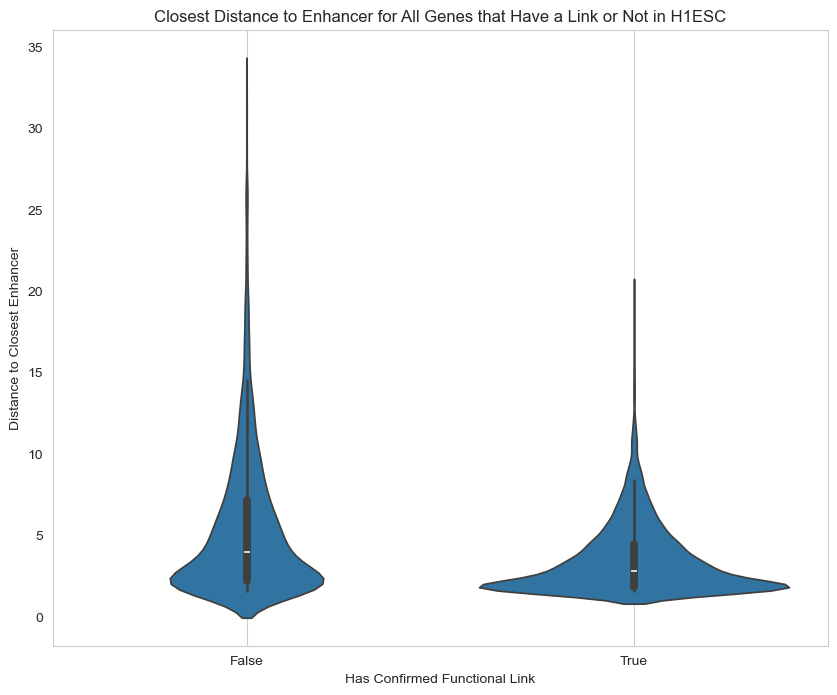

In [230]:
# Box plot of the distance to the closest enhancer for all genes that have a link or not in H1ESC
plt.figure(figsize=(10, 8))
sns.violinplot(data=h1esc_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
h1esc_has_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
h1esc_no_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(h1esc_has_link, h1esc_no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Confirmed Functional Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Closest Distance to Enhancer for All Genes that Have a Link or Not in H1ESC")
plt.grid()
plt.savefig("figs/exp1_h1.png", dpi=300, bbox_inches='tight')
plt.show()

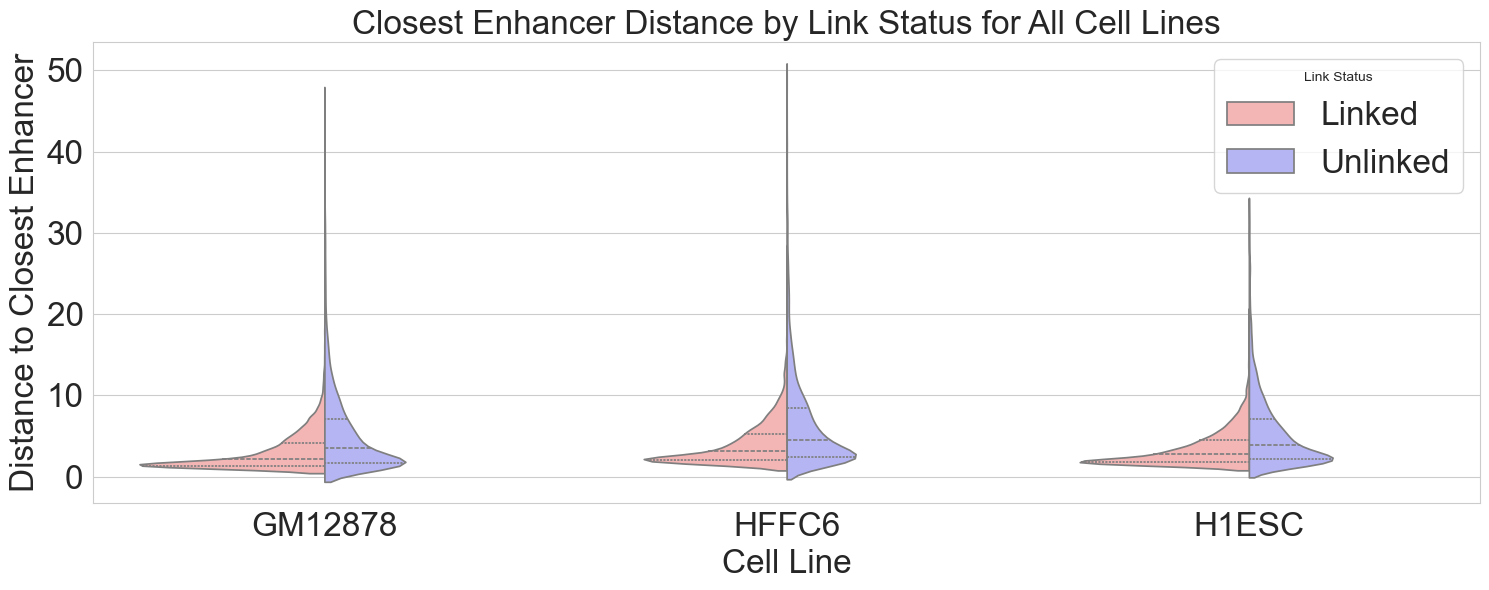

In [231]:
# Prepare data for all cell lines in a single DataFrame
gm12878 = gm12878_gene_to_closest_avg_enhancer_all.copy()
gm12878['cell_line'] = 'GM12878'
hffc6 = hffc6_gene_to_closest_avg_enhancer_all.copy()
hffc6['cell_line'] = 'HFFC6'
h1esc = h1esc_gene_to_closest_avg_enhancer_all.copy()
h1esc['cell_line'] = 'H1ESC'

all_data = pd.concat([gm12878, hffc6, h1esc])
all_data['link_status'] = all_data['has_link'].map({True: 'Linked', False: 'Unlinked'})

p1 = mannwhitneyu(
    gm12878[gm12878['has_link'] == True]['min_dist'],
    gm12878[gm12878['has_link'] == False]['min_dist'],
    alternative='two-sided'
).pvalue

p2 = mannwhitneyu(
    hffc6[hffc6['has_link'] == True]['min_dist'],
    hffc6[hffc6['has_link'] == False]['min_dist'],
    alternative='two-sided'
).pvalue

p3 = mannwhitneyu(
    h1esc[h1esc['has_link'] == True]['min_dist'],
    h1esc[h1esc['has_link'] == False]['min_dist'],
    alternative='two-sided'
).pvalue
annotations = [
    ('Unlinked', 'Linked', p1),
    ('Unlinked', 'Linked', p2),
    ('Unlinked', 'Linked', p3),
]

plt.figure(figsize=(15, 6))
ax = sns.violinplot(
    data=all_data,
    x='cell_line',
    y='min_dist',
    hue='link_status',
    split=True,
    inner='quartile',
    order=['GM12878', 'HFFC6', 'H1ESC'],
    hue_order=['Linked', 'Unlinked'],
    palette={'Linked': '#FFAAAA', 'Unlinked': '#AAAAFF'},
    common_norm=True
)
plt.xlabel('Cell Line', fontsize=24)
plt.ylabel('Distance to Closest Enhancer', fontsize=24)
plt.title('Closest Enhancer Distance by Link Status for All Cell Lines', fontsize=24)
plt.legend(title='Link Status', loc='upper right', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# starbars.draw_annotation(annotations=annotations, ax=ax)

plt.tight_layout()
plt.savefig("figs/exp1_all_cell_lines.png", dpi=300, bbox_inches='tight')
plt.show()

U-statistic: 7360532.5, p-value: 7.895824485289726e-107
2.0 0.03


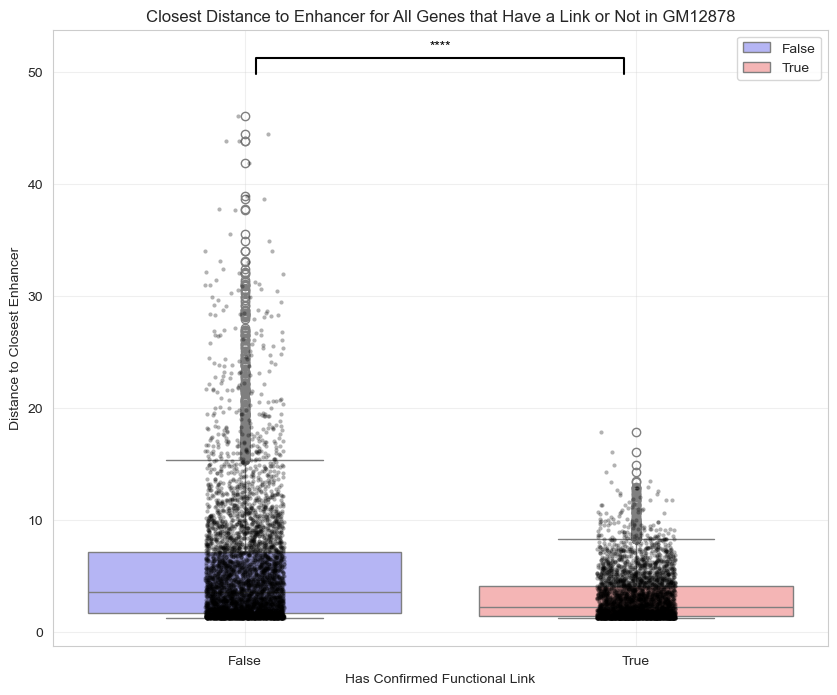

U-statistic: 6916865.5, p-value: 2.5252928556447934e-92
2.0 0.03


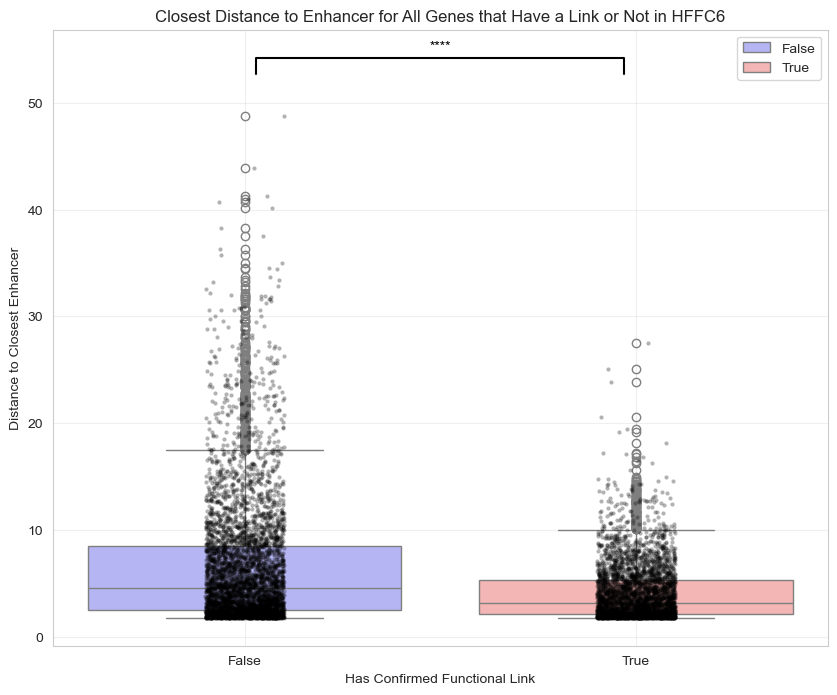

U-statistic: 7255456.5, p-value: 4.766785186208411e-97
2.0 0.03


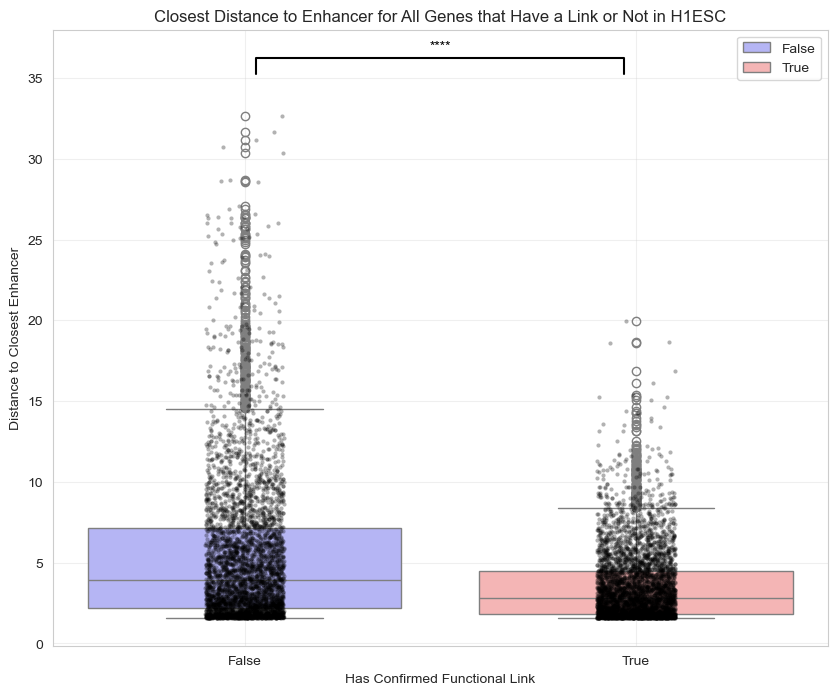

In [232]:

def plot_with_starbars(df, column, title, palette=None, plot_path=None):
    """
    Creates a boxplot with significance stars using starbars package.

    Args:
        df: DataFrame with 'has_link' column
        column: Column to plot (e.g. 'min_dist')
        title: Plot title
        palette: Optional color palette for the plot
    """
    plt.figure(figsize=(10, 8))

    # Create boxplot
    ax = sns.boxplot(
        data=df,
        x='has_link',
        y=column,
        palette=palette or ['#AAAAFF', '#FFAAAA'],
        hue='has_link'
    )

    # Add individual data points
    sns.stripplot(
        data=df,
        x='has_link',
        y=column,
        color='black',
        size=3,
        alpha=0.3,
        jitter=True
    )

    # Perform Mann-Whitney U test
    has_link = df[df["has_link"] == True][column]
    no_link = df[df["has_link"] == False][column]
    stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
    print(f"U-statistic: {stat}, p-value: {p}")

    # Add significance stars using starbars
    annotations = [(False, True, p)]  # Compare False vs True
    starbars.draw_annotation(
        annotations=annotations,
        ax=ax
    )

    plt.title(title)
    plt.xlabel("Has Confirmed Functional Link")
    plt.ylabel("Distance to Closest Enhancer")
    plt.grid(alpha=0.3)
    if plot_path:
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')

    return plt

# Example usage for each cell line
plot_with_starbars(
    gm12878_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "Closest Distance to Enhancer for All Genes that Have a Link or Not in GM12878",
    plot_path="figs/exp1_gm_star.png"
).show()

plot_with_starbars(
    hffc6_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "Closest Distance to Enhancer for All Genes that Have a Link or Not in HFFC6",
    plot_path="figs/exp1_hffc_star.png"
).show()

plot_with_starbars(
    h1esc_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "Closest Distance to Enhancer for All Genes that Have a Link or Not in H1ESC",
    plot_path="figs/exp1_h1_star.png"
).show()

In [233]:
gm12878_neanderthal_all_pairs_with_has_link = gm12878_neanderthal_df_ref.copy()
gm12878_neanderthal_all_pairs_with_has_link['has_link'] = (
    gm12878_neanderthal_all_pairs_with_has_link['gene_id'].isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & gm12878_neanderthal_all_pairs_with_has_link['enh_id'].isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

hffc6_neanderthal_all_pairs_with_has_link = hffc6_neanderthal_df_ref.copy()
hffc6_neanderthal_all_pairs_with_has_link['has_link'] = (
    hffc6_neanderthal_all_pairs_with_has_link['gene_id'].isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & hffc6_neanderthal_all_pairs_with_has_link['enh_id'].isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

h1esc_neanderthal_all_pairs_with_has_link = h1esc_neanderthal_df_ref.copy()
h1esc_neanderthal_all_pairs_with_has_link['has_link'] = (
    h1esc_neanderthal_all_pairs_with_has_link['gene_id'].isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & h1esc_neanderthal_all_pairs_with_has_link['enh_id'].isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

In [234]:
all_pairs_joined_hffc6_h1esc = (
    gm12878_neanderthal_all_pairs_with_has_link
    .merge(
        hffc6_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_gm12878", "_hffc6"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, gm12878_avg_dist, hffc6_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (gm12878, hffc6)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_gm12878_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_hffc6_yes_link_gm12878_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_12757/2772785186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


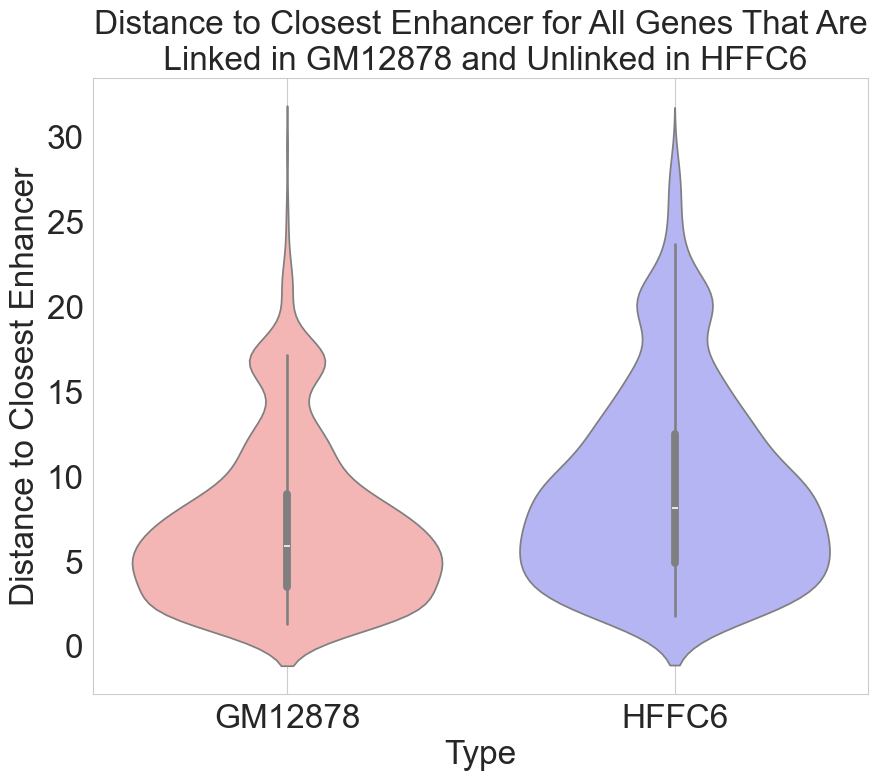

In [235]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
all_pairs_by_type_gm12878_yes_link_hffc6_no_link['type'] = all_pairs_by_type_gm12878_yes_link_hffc6_no_link['type'].str.upper()

plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_gm12878_yes_link_hffc6_no_link,
    palette={"GM12878": "#FFAAAA", "HFFC6": "#AAAAFF"}
)

plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)

plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in GM12878 and Unlinked in HFFC6", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_gm_to_hffc_fwd_violin.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_12757/714150416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


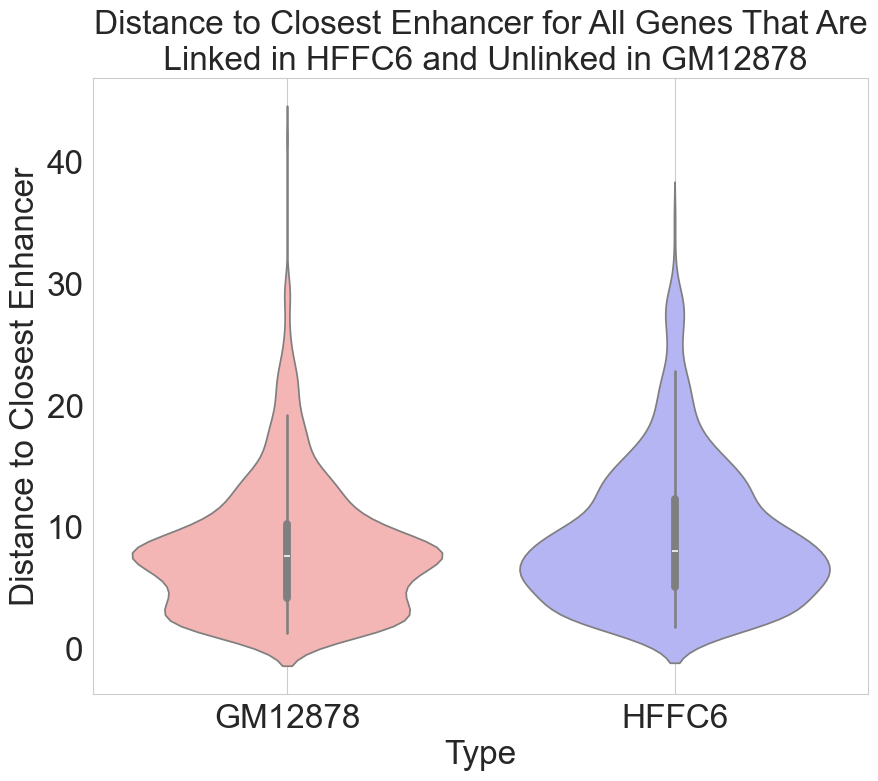

In [236]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
all_pairs_by_type_hffc6_yes_link_gm12878_no_link['type'] = all_pairs_by_type_hffc6_yes_link_gm12878_no_link['type'].str.upper()

plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_gm12878_no_link,
    palette={"GM12878": "#FFAAAA", "HFFC6": "#AAAAFF"}
)
plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)

plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in HFFC6 and Unlinked in GM12878", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_gm_to_hffc_bck_violin.png", dpi=300, bbox_inches='tight')
plt.show()

In [237]:
all_pairs_joined_hffc6_h1esc = (
    hffc6_neanderthal_all_pairs_with_has_link
    .merge(
        h1esc_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_hffc6", "_h1esc"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, hffc6_avg_dist, h1esc_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (hffc6, h1esc)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_hffc6_yes_link_h1esc_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_h1esc_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_12757/124910878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


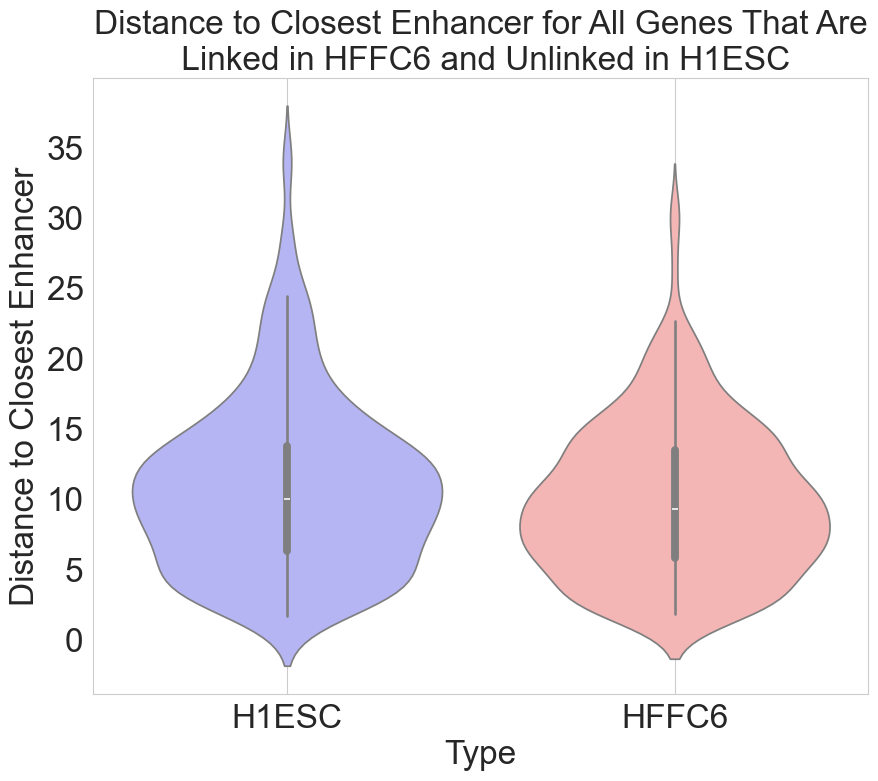

In [238]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
all_pairs_by_type_hffc6_yes_link_h1esc_no_link['type'] = all_pairs_by_type_hffc6_yes_link_h1esc_no_link['type'].str.upper()

plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_h1esc_no_link,
    palette={"HFFC6": "#FFAAAA", "H1ESC": "#AAAAFF"}
)
plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)

plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in HFFC6 and Unlinked in H1ESC", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_hffc_to_h1_fwd_violin.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_12757/2675463708.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


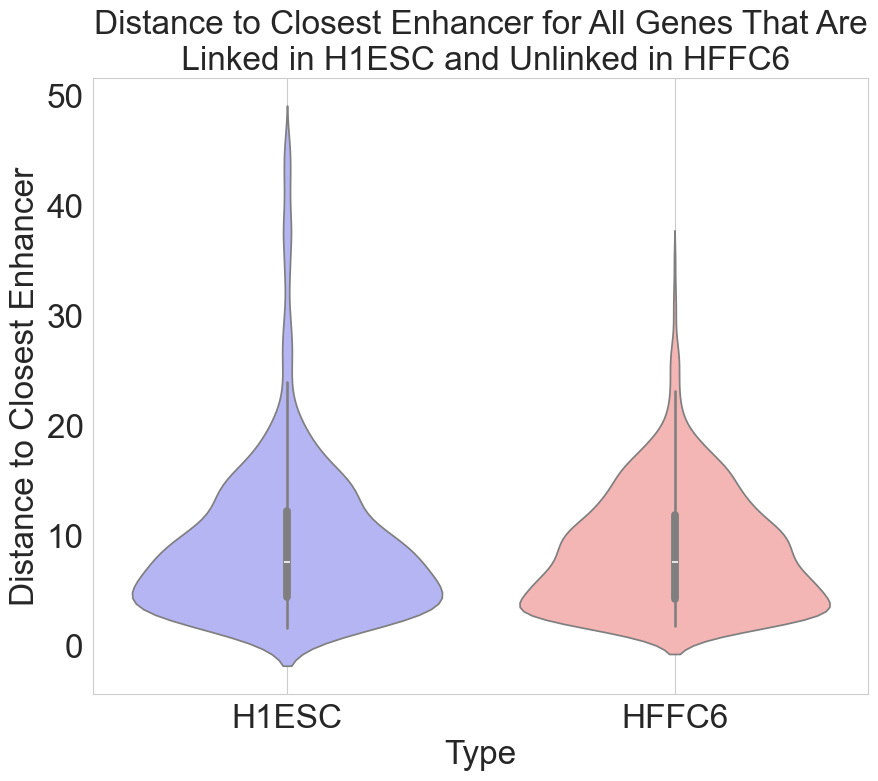

In [239]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
all_pairs_by_type_h1esc_yes_link_hffc6_no_link['type'] = all_pairs_by_type_h1esc_yes_link_hffc6_no_link['type'].str.upper()

plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_h1esc_yes_link_hffc6_no_link,
    palette={"HFFC6": "#FFAAAA", "H1ESC": "#AAAAFF"}
)
plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)

plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in H1ESC and Unlinked in HFFC6", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_hffc_to_h1_bck_violin.png", dpi=300, bbox_inches='tight')
plt.show()

In [240]:
all_pairs_joined_gm12878_h1esc = (
    gm12878_neanderthal_all_pairs_with_has_link
    .merge(
        h1esc_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_gm12878", "_h1esc"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, gm12878_avg_dist, h1esc_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (gm12878, h1esc)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_gm12878_yes_link_h1esc_no_link = (
    all_pairs_joined_gm12878_h1esc
    [
        (all_pairs_joined_gm12878_h1esc["has_link_gm12878"] == True) &
        (all_pairs_joined_gm12878_h1esc["has_link_h1esc"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_h1esc_yes_link_gm12878_no_link = (
    all_pairs_joined_gm12878_h1esc[
        (all_pairs_joined_gm12878_h1esc["has_link_h1esc"] == True) &
        (all_pairs_joined_gm12878_h1esc["has_link_gm12878"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_12757/634155747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


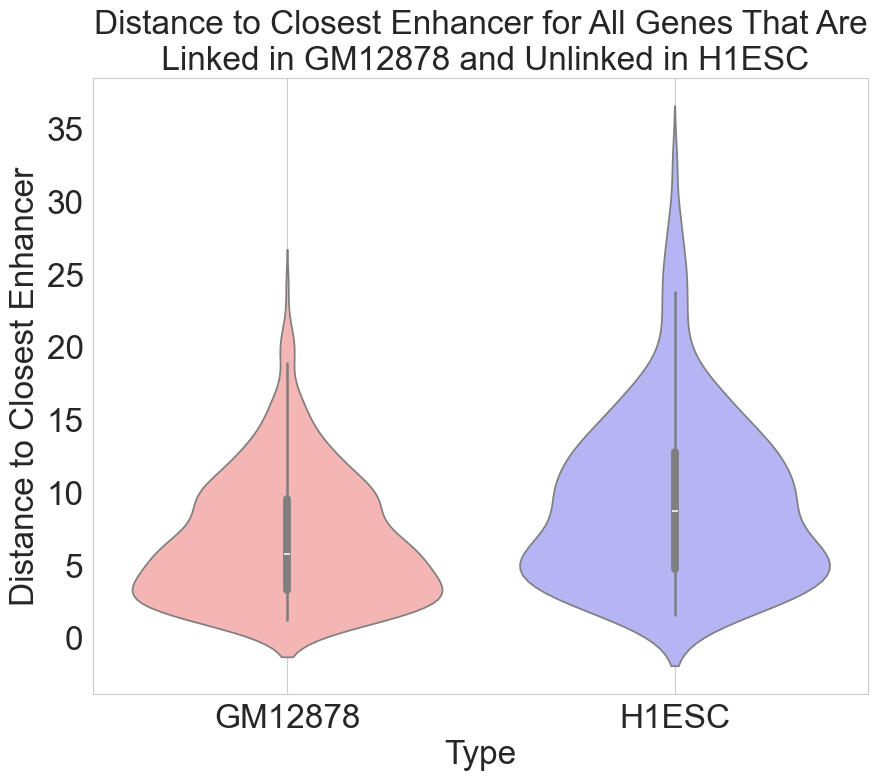

In [241]:
plt.figure(figsize=(10, 8))
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
all_pairs_by_type_gm12878_yes_link_h1esc_no_link['type'] = all_pairs_by_type_gm12878_yes_link_h1esc_no_link['type'].str.upper()

sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_gm12878_yes_link_h1esc_no_link,
    palette={"GM12878": "#FFAAAA", "H1ESC": "#AAAAFF"}
)

plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)
plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in GM12878 and Unlinked in H1ESC", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_gm_to_h1_fwd_violin.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_12757/859424125.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


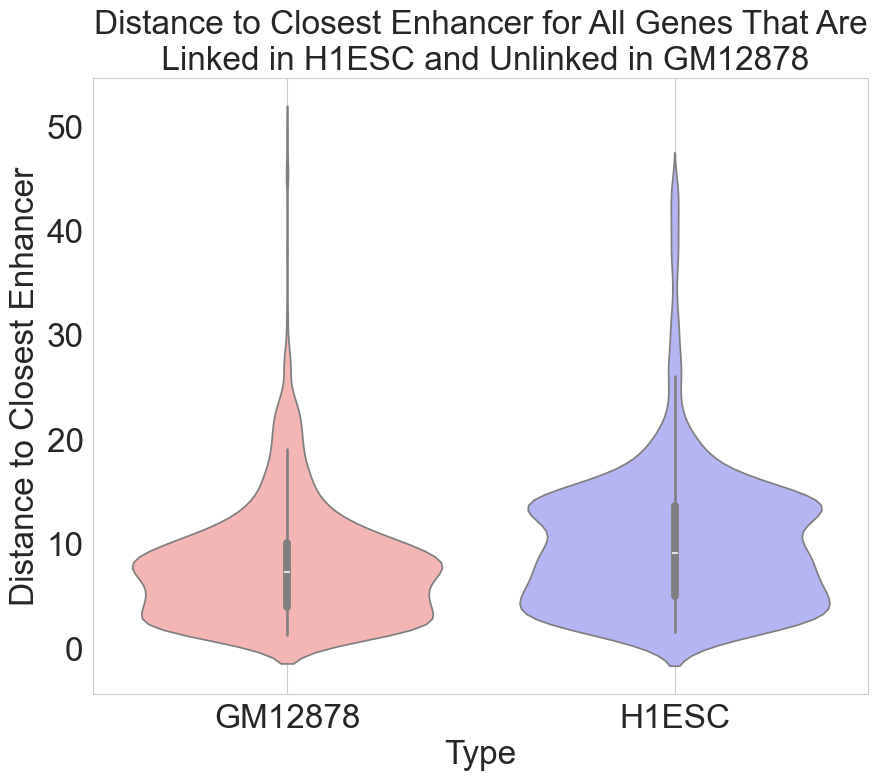

In [242]:
plt.figure(figsize=(10, 8))
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
all_pairs_by_type_h1esc_yes_link_gm12878_no_link['type'] = all_pairs_by_type_h1esc_yes_link_gm12878_no_link['type'].str.upper()

sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_h1esc_yes_link_gm12878_no_link,
    palette={"GM12878": "#FFAAAA", "H1ESC": "#AAAAFF"}
)

plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)
plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in H1ESC and Unlinked in GM12878", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_gm_to_h1_bck_violin.png", dpi=300, bbox_inches='tight')
plt.show()

In [243]:
# 1. Add quartile-based category columns for each cell line
for df, name in [
    (gm12878_gene_to_closest_avg_enhancer_all, 'gm12878'),
    (hffc6_gene_to_closest_avg_enhancer_all, 'hffc6'),
    (h1esc_gene_to_closest_avg_enhancer_all, 'h1esc'),
]:
    q1 = df['min_dist'].quantile(0.33)
    q3 = df['min_dist'].quantile(0.66)
    def label_quartile(x):
        if x <= q1:
            return 'small'
        elif x <= q3:
            return 'mid'
        else:
            return 'large'
    df['quartile_cat'] = df['min_dist'].apply(label_quartile)

In [244]:
def plot_quartile_jumps_heatmap(jumps, title, y_label, x_label, plot_path=None):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.patches import Patch

    quartiles = ['small', 'mid', 'large']
    matrix = np.zeros((3, 3), dtype=int)

    # Fill the matrix with counts
    for i, src in enumerate(quartiles):
        for j, dst in enumerate(quartiles):
            matrix[i, j] = jumps.get((src, dst), 0)

    plt.figure(figsize=(6, 6))

    # Create base heatmap without annotations
    ax = sns.heatmap(
        matrix,
        annot=False,
        fmt='d',
        cmap=sns.color_palette(['#b3cde3']),
        xticklabels=quartiles,
        yticklabels=quartiles,
        cbar=False
    )

    # Colors for different transition types
    dark_red = 'darkred'      # small -> large (most dramatic increase)
    medium_red = '#FF5050'    # mid -> large (moderate increase)
    dark_green = 'darkgreen'  # large -> small (most dramatic decrease)
    medium_green = '#50A050'  # large -> mid (moderate decrease)

    if matrix[0, 2] > 0:
        ax.add_patch(plt.Rectangle((2, 0), 1, 1, fill=True, color=dark_red, alpha=0.7))
        ax.text(2.5, 0.5, str(matrix[0, 2]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=24)
    if matrix[2, 0] > 0:
        ax.add_patch(plt.Rectangle((0, 2), 1, 1, fill=True, color=dark_green, alpha=0.7))
        ax.text(0.5, 2.5, str(matrix[2, 0]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=24)
    if matrix[1, 2] > 0:
        ax.add_patch(plt.Rectangle((2, 1), 1, 1, fill=True, color=medium_red, alpha=0.7))
        ax.text(2.5, 1.5, str(matrix[1, 2]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=24)
    if matrix[2, 1] > 0:
        ax.add_patch(plt.Rectangle((1, 2), 1, 1, fill=True, color=medium_green, alpha=0.7))
        ax.text(1.5, 2.5, str(matrix[2, 1]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=24)

    # Add annotations for the remaining cells
    for i in range(3):
        for j in range(3):
            # Skip cells we've already handled
            if (i == 0 and j == 2) or (i == 2 and j == 0) or \
               (i == 1 and j == 2) or (i == 2 and j == 1):
                continue
            ax.text(
                j + 0.5,
                i + 0.5,
                str(matrix[i, j]),
                ha="center",
                va="center",
                color="black",
                fontsize=24
            )

    plt.xlabel(x_label, fontsize=24)
    plt.ylabel(y_label, fontsize=24)
    plt.title(title, fontsize=24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    # Add legend with all transition types
    legend_elements = [
        Patch(facecolor=dark_red, alpha=0.7, label='Small → Large'),
        Patch(facecolor=medium_red, alpha=0.7, label='Mid → Large'),
        Patch(facecolor=dark_green, alpha=0.7, label='Large → Small'),
        Patch(facecolor=medium_green, alpha=0.7, label='Large → Mid'),
        Patch(facecolor='#b3cde3', label='Other transitions')
    ]
    plt.legend(handles=legend_elements, loc='upper center',
               bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=16)

    if plot_path:
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    else:
        plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/matplotlib/pyplot.py'>

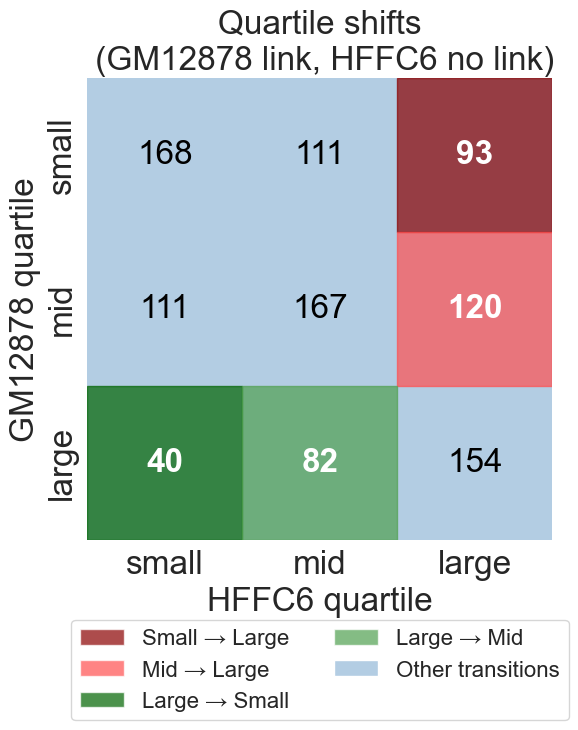

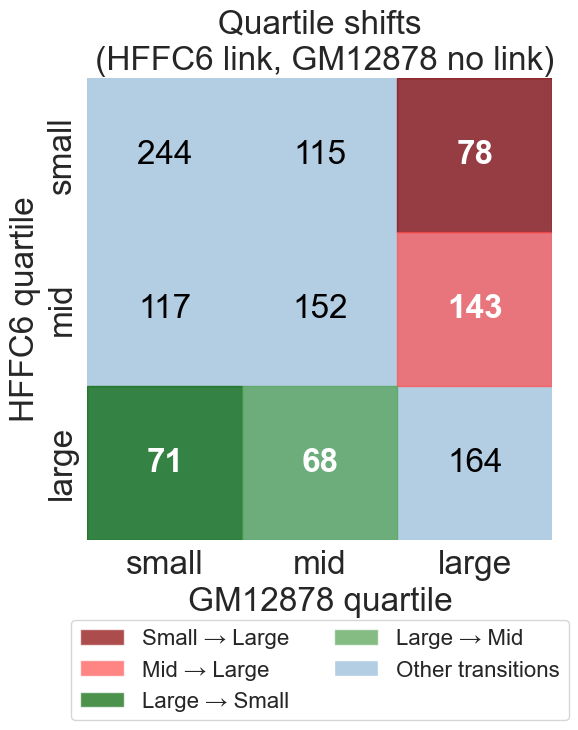

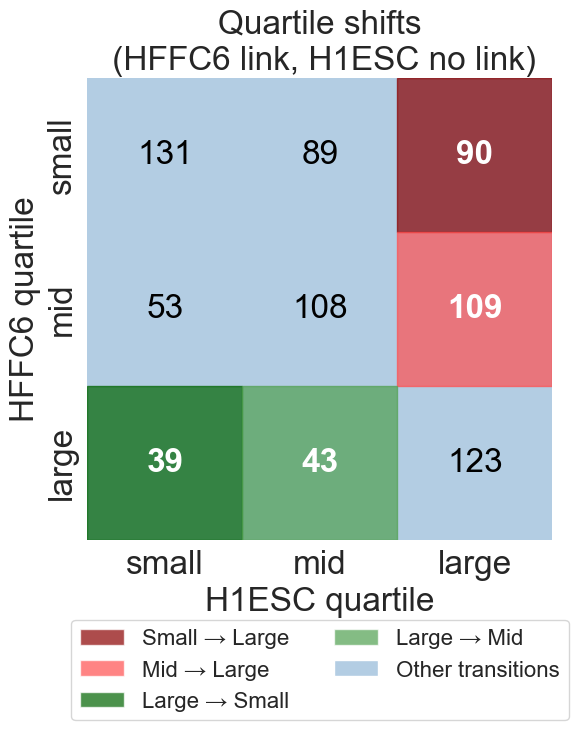

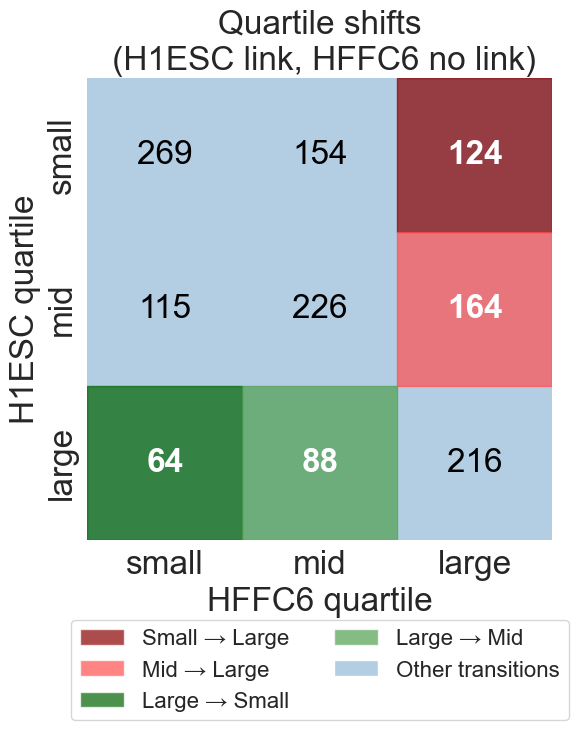

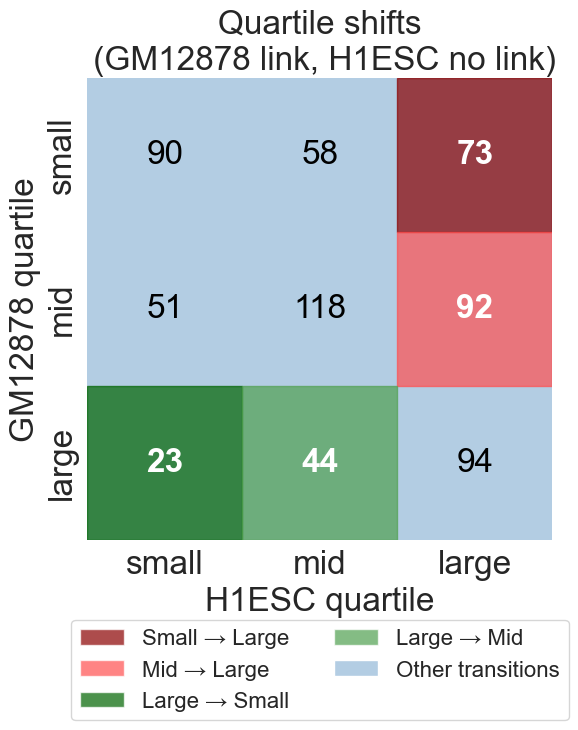

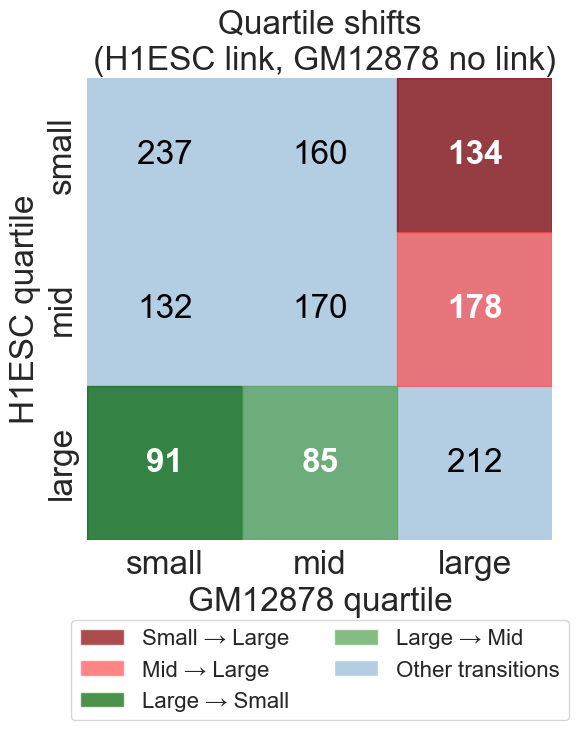

In [245]:
# 2. Compare quartile jumps for genes with link in one cell line but not the other
# Example: GM12878 vs HFFC6
merged_gm12878_hffc6 = gm12878_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    hffc6_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_gm12878', '_hffc6')
)
# Genes with link in GM12878 but not in HFFC6
jump_gm12878_link = merged_gm12878_hffc6[(merged_gm12878_hffc6['has_link_gm12878']) & (~merged_gm12878_hffc6['has_link_hffc6'])]
# Genes with link in HFFC6 but not in GM12878
jump_hffc6_link = merged_gm12878_hffc6[(merged_gm12878_hffc6['has_link_hffc6']) & (~merged_gm12878_hffc6['has_link_gm12878'])]

# Count quartile jumps
from collections import Counter
jumps_hffc6_no_link_to_gm12878_link = Counter(zip(jump_gm12878_link['quartile_cat_gm12878'], jump_gm12878_link['quartile_cat_hffc6']))
jumps_gm12878_no_link_to_hffc6_link = Counter(zip(jump_hffc6_link['quartile_cat_hffc6'], jump_hffc6_link['quartile_cat_gm12878']))


plot_quartile_jumps_heatmap(jumps_hffc6_no_link_to_gm12878_link, 'Quartile shifts\n (GM12878 link, HFFC6 no link)', 'GM12878 quartile', 'HFFC6 quartile', 'figs/exp2_gm_to_hffc_fwd_qjumps.png')
plot_quartile_jumps_heatmap(jumps_gm12878_no_link_to_hffc6_link, 'Quartile shifts\n (HFFC6 link, GM12878 no link)', 'HFFC6 quartile', 'GM12878 quartile', 'figs/exp2_gm_to_hffc_bck_qjumps.png')

# HFFC6 <-> H1ESC
merged_hffc6_h1esc = hffc6_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    h1esc_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_hffc6', '_h1esc')
)
jump_hffc6_link_h1esc = merged_hffc6_h1esc[(merged_hffc6_h1esc['has_link_hffc6']) & (~merged_hffc6_h1esc['has_link_h1esc'])]
jump_h1esc_link_hffc6 = merged_hffc6_h1esc[(merged_hffc6_h1esc['has_link_h1esc']) & (~merged_hffc6_h1esc['has_link_hffc6'])]
from collections import Counter
jumps_hffc6_h1esc = Counter(zip(jump_hffc6_link_h1esc['quartile_cat_hffc6'], jump_hffc6_link_h1esc['quartile_cat_h1esc']))
jumps_h1esc_hffc6 = Counter(zip(jump_h1esc_link_hffc6['quartile_cat_h1esc'], jump_h1esc_link_hffc6['quartile_cat_hffc6']))

plot_quartile_jumps_heatmap(jumps_hffc6_h1esc, 'Quartile shifts\n (HFFC6 link, H1ESC no link)', 'HFFC6 quartile', 'H1ESC quartile', 'figs/exp2_hffc_to_h1_fwd_qjumps.png')
plot_quartile_jumps_heatmap(jumps_h1esc_hffc6, 'Quartile shifts\n (H1ESC link, HFFC6 no link)', 'H1ESC quartile', 'HFFC6 quartile', 'figs/exp2_hffc_to_h1_bck_qjumps.png')

# GM12878 <-> H1ESC
merged_gm12878_h1esc = gm12878_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    h1esc_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_gm12878', '_h1esc')
)
jump_gm12878_link_h1esc = merged_gm12878_h1esc[(merged_gm12878_h1esc['has_link_gm12878']) & (~merged_gm12878_h1esc['has_link_h1esc'])]
jump_h1esc_link_gm12878 = merged_gm12878_h1esc[(merged_gm12878_h1esc['has_link_h1esc']) & (~merged_gm12878_h1esc['has_link_gm12878'])]
jumps_gm12878_h1esc = Counter(zip(jump_gm12878_link_h1esc['quartile_cat_gm12878'], jump_gm12878_link_h1esc['quartile_cat_h1esc']))
jumps_h1esc_gm12878 = Counter(zip(jump_h1esc_link_gm12878['quartile_cat_h1esc'], jump_h1esc_link_gm12878['quartile_cat_gm12878']))

plot_quartile_jumps_heatmap(jumps_gm12878_h1esc, 'Quartile shifts\n (GM12878 link, H1ESC no link)', 'GM12878 quartile', 'H1ESC quartile', 'figs/exp2_gm_to_h1_fwd_qjumps.png')
plot_quartile_jumps_heatmap(jumps_h1esc_gm12878, 'Quartile shifts\n (H1ESC link, GM12878 no link)', 'H1ESC quartile', 'GM12878 quartile', 'figs/exp2_gm_to_h1_bck_qjumps.png')

In [ ]:
from gprofiler import GProfiler

gp = GProfiler(
    user_agent='enhancer3d', #optional user agent
    return_dataframe=True, #return pandas dataframe or plain python structures
)

def cell_line_1_small_has_link_other_cell_line_large_no_link(
    cell_line_1_gene_to_closest_avg_enhancer,
    cell_lines_gene_to_closest_avg_enhancer,
    cell_line_1_name
):
    """
    Finds genes that are small in cell line 1 and large in cell line 2, with a link in cell line 1 but not in cell line 2.
    """
    result = (
        cell_line_1_gene_to_closest_avg_enhancer
        .merge(
            cell_line_2_gene_to_closest_avg_enhancer,
            on="gene_id",
            suffixes=("_" + cell_line_1_name, "_" + cell_line_2_name)
        )
        .query(
            f"quartile_cat_{cell_line_1_name} == 'small' and quartile_cat_{cell_line_2_name} == 'large' and has_link_{cell_line_1_name} == True and has_link_{cell_line_2_name} == False"
        )
        .query(
            f"quartile_cat_{cell_line_1_name} == 'small' and quartile_cat_{cell_line_2_name} == 'large'"
        )
    )

    gene_names = (
        gp
        .convert(
            organism='hsapiens',
            query=result.index.unique().tolist()
        )
        [['converted', 'name']]
        .set_index('converted', drop=True)
    )

    result = result.merge(
        gene_names,
        left_index=True,
        right_index=True,
        how='inner'
    )

    return list(filter(lambda x: x != 'None', result['name'].tolist()))

In [ ]:
print("GM12878 small has link, HFFC6 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        gm12878_gene_to_closest_avg_enhancer_all,
        hffc6_gene_to_closest_avg_enhancer_all,
        'gm12878',
        'hffc6'
    )
))

In [248]:
print("HFFC6 small has link, GM12878 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        hffc6_gene_to_closest_avg_enhancer_all,
        gm12878_gene_to_closest_avg_enhancer_all,
        'hffc6',
        'gm12878'
    )
))

HFFC6 small has link, GM12878 large no link:
CERS1
PCDHA7
PCDHA6
PCDHA5
KISS1
PCDHA4
NPIPB12
PCDHA3
LPCAT2
SERPINH1
NPIPB11
SPOCK1
FAIM
PRELP
FRMPD1
TWIST2
ACOT11
COPB1
C1QTNF9
RAP1GAP2
CFAP299
SORBS3
CA12
SYT5
SPCS2
XRRA1
SAXO2
SALL2
FOSL2
COL5A1
MRPS2
PSPC1
GNG12
MRPL21
IGHMBP2
SLC2A10
TMEM14B
C1QTNF4
KCNMA1
GRIP2
PAPPA
ARRDC1
DHX9
KDM5B
ADAMTS2
BROX
PRXL2A
VEGFC
PNPT1
AIDA
CLEC18A
TGFBR3
TBX4
CEP126
OGN
ANGPTL5
PHETA1
LSM3
XPC
ARRDC4
CDCP1
FAM234B
NPR3
ASB1
GPRC5D
YBX3
UPP1
RTN4
TSC22D1
TMEM86A
DLG5
GAS6
MFSD2B
TNC
YAP1
CHMP1B
ADH1A


In [249]:
print("HFFC6 small has link, H1ESC large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        hffc6_gene_to_closest_avg_enhancer_all,
        h1esc_gene_to_closest_avg_enhancer_all,
        'hffc6',
        'h1esc'
    )
))

HFFC6 small has link, H1ESC large no link:
IFI16
LIMA1
GLIPR2
OTUD3
RBM15
SIRPA
ZNF697
MCM3
NLE1
IER3
MCAT
SPOCK1
HNRNPA0
CD14
CLTA
TRAM2
ANXA11
TLN2
USP3
ARSG
COPB1
C1QTNF9
API5
DNLZ
INPP5E
ZNF438
SGF29
CA12
SPCS2
XRRA1
AK3
SHB
SLC12A2
TTPAL
ADAM32
ADAM9
TM2D2
HIVEP3
UROS
BCCIP
SPATA6L
EDRF1
PLPP6
ATP6V1G1
SFRP1
ARRDC1
TUBE1
FAM229B
STYK1
PDPR
UBAP1
LYVE1
ATG12
AP3S1
GRK4
NOP14
NAV3
BRCA2
PRXL2A
USP15
TBX4
CEP126
ANGPTL5
PHETA1
ARRDC4
CDCP1
RNF44
NPR3
TAF2
CFAP69
CCDC121
YBX3
FYCO1
METAP1
RTN4
ALDH2
KLHL42
RPS27AP5
ATP5F1E
DLG5
MFSD2B
TNC
HPS5
GTF2H1
FIGNL1
STK24
YAP1
SH3RF1


In [250]:
print("H1ESC small has link, HFFC6 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        h1esc_gene_to_closest_avg_enhancer_all,
        hffc6_gene_to_closest_avg_enhancer_all,
        'h1esc',
        'hffc6'
    )
))

H1ESC small has link, HFFC6 large no link:
FOXN1
FOXA3
IQCF3
HPCAL4
SMIM6
ITIH3
NEFM
OTOP2
USH1G
MYMK
TAS2R5
NCCRP1
SMPDL3B
NOVA2
NUP210
PCDHB15
SYNE4
ALKBH6
LRRC2
DENND1C
SETX
ETNK2
EFR3B
VAV1
ADGRG3
DNMT3L
ADAMTSL2
CRIP3
GAST
BPIFB2
TEFM
ADAP2
SPC25
KIF12
WDR49
IQCF6
GCM1
IFT80
OXER1
RNASE6
KRT79
MT1F
OPA1
MEIOB
ZSCAN32
ZNF174
TYMS
PCDH8
ZNF597
SESN1
LRRN2
CDON
ZNF75A
TIGD7
ALOX15
ADRB3
GABRD
FAM209B
GCNT7
PPP1R27
SPATA22
TSGA10IP
CDC123
NUDT5
RYR1
ADGRE2
KIAA2012
ACTR3C
MAJIN
KRBA1
RARRES2
OVOL3
ACADSB
IKZF5
CLC
POM121L2
TNFSF14
IQCF1
MRGPRD
GPRIN2
CA2
POTEF
PM20D1
KANSL2
CACNG8
SPMIP8
CEP295
TTYH1
SLC2A14
CNGB1
RAB6C
SRP72
HCN4
CASP14
ALDH3A2
ZNF22
ARL9
CPD
CST1
MAG
CCDC33
MACROH2A2
ZNF562
RASAL3
CCDC74A
RNGTT
CECR2
LSR
TNKS2
ACAP2
MROH2A
OMG
IFNL1
PHF21B
KRTAP12-4
KDR
ZNF713
CRACD
HHIPL2
CRYGB
ZNF266
SYNDIG1


In [251]:
print("GM12878 small has link, H1ESC large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        gm12878_gene_to_closest_avg_enhancer_all,
        h1esc_gene_to_closest_avg_enhancer_all,
        'gm12878',
        'h1esc'
    )
))

GM12878 small has link, H1ESC large no link:
IL19
LY9
FCMR
CD55
CD244
ADGRE3
SMARCE1
HLA-DRA
IFI16
TRIM22
CD14
LGMN
LEUTX
CREBL2
HLA-F
CDCA2
IER3
TNF
LEO1
PLPP6
RUVBL1
HERC1
EEFSEC
NOP14
GRK4
CAMK2B
NCF2
TAGAP
FAM193A
TMEM14C
GLO1
NANS
GLIPR2
TMEM156
ARHGDIB
DCLRE1C
CARD11
SUV39H2
CDNF
PKN2
CD1C
ISOC1
DNLZ
UBA6
KLHL5
BRIX1
PCYT1A
EED
STK4
STAU2
NDUFV2
ADPRH
TOMM34
SMIM15
MOV10L1
IGF2R
STK17B
SGF29
CDCA7
SLC9A3
FAM117B
UEVLD
MISFA
IRS1
ANKRD12
STK24
PRKCI
OR13A1
PHC3
CRBN
ALOX5
TUT7
TM6SF1


In [252]:
print("H1ESC small has link, GM12878 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        h1esc_gene_to_closest_avg_enhancer_all,
        gm12878_gene_to_closest_avg_enhancer_all,
        'h1esc',
        'gm12878'
    )
))

H1ESC small has link, GM12878 large no link:
LGALS12
P2RX3
PGLYRP1
IQCF3
PPIE
HPCAL4
JPH4
PRR22
NEFM
JAG2
PCDHA13
PCDHGA1
NOVA2
SORBS3
PCDHA1
PCDHA4
PCDHA12
SULT1A4
BOLA2-SMG1P6
SLX1B
BOLA2
PCDHB15
NPIPB12
PCDHA6
PCDHGA2
PCDHA11
ZBTB25
PCDHA8
LRRC2
NPIPB11
TNRC6A
CLIP3
ETNK2
ADGRG3
GFPT2
CIMAP2
ACOT11
TEFM
ADAP2
SRPRA
FOXRED1
ZNF506
KIF12
WDR49
IQCF6
RNASE6
ZNF496
TIRAP
FGF19
HAUS2
LRRC57
FAM118B
RPUSD4
ZNF253
NDC1
PKNOX2
PCDH8
PRR5
PDE9A
ADNP2
CDON
CYB561
CRIPTO
HRH3
ZNF75A
TIGD7
TAF4
TFAP2C
ACRV1
SDC4
SALL2
SPATA22
NLRC3
ADGRF3
KIAA2012
ACTR3C
ALMS1
ZNF354B
STAB1
H2BC13
H2AC13
ZNF454
ZNF835
MRGPRD
GRM6
SYT5
SOX13
ASIC3
PRSS41
SH3BGR
LUC7L3
CACNG8
GPRC5D
CNGB1
RAB6C
SRP72
HCN4
LCA5L
FAM234B
ZNF22
ARL9
SERAC1
CST1
ILVBL
LEPROTL1
CYP4V2
PAX6
MACROH2A2
ZNF562
RASAL3
TSC22D1
ZNF766
TVP23C-CDRT4
TVP23C
CECR2
MROH2A
UTF1
IFNL1
PHF21B
KRTAP12-4
KDR
AKNAD1
MAP2K3
CRACD
PATJ
CRYGB
NUDT6
AFG2A
ZNF266
RALYL
ZSCAN4
ZNF749
ZNF550
ZNF549
